In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
birthDF = pd.read_csv('C:/pandasTest/data/births.csv', index_col='year')
# birthDF.columns = birthDF.columns.str.strip()
# birthDF
birthDF

,boys,girls
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [105]:
birthDF.columns

Index(['boys', 'girls', '남아율(%)'], dtype='object')

```text
1. 남아 ,여아 출생 평균을 구하시요

In [86]:
birthDF.mean().round()

boys       1225776.0
girls      1245399.0
남아율      124540021.0
dtype: float64

```text
2. 남아 수가 평균보다 많은 연도만 출력하시오

In [113]:
birthDF[birthDF[' boys']> birthDF[' boys'].mean()].index

Index([1921, 1924, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
      dtype='int64', name='year')

```text
3. 남아출생이 가장많은 top5를 구하시요(년도와 남아수)

In [114]:
birthDF.nlargest(5,' boys', keep='all')

,boys,girls
year,,
1957,2044160,2155866
1959,2023044,2133509
1960,2022093,2132717
1961,2017316,2122502
1958,2010884,2120712


In [ ]:
birthDF[' boys'].nlargest(5, keep='all')

year
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name: boys, dtype: int64

```text
4. 남아율(%) 을 구하고 각년도별 남아수가 차지하는 비율컬럼을 추가하시요

In [ ]:
birthDF['남아율(%)'] = (birthDF[' boys']/(birthDF[' boys']+birthDF[' girls']))*100

In [95]:
birthDF

,boys,girls,남아율(%)
year,,,
1880,90993,110491,45.161402
1881,91954,100745,47.718981
1882,107850,113688,48.682393
1883,112321,104629,51.772759
1884,129022,114445,52.993630
...,...,...,...
2007,1919408,2072139,48.086819
2008,1887234,2036289,48.100495
2009,1832925,1979303,48.080152


```text
 5. 2000년도 이후데이터 에 대해 출생량 을 구하고
남아수가 1800000 이상이면 '많음'아니면 '적음' 이라고 보여 주시요( 결과는 데이터프레임)
년도 	남아수 출생량
----------------------
2000   1233   '많음'
2001   1234   '적음'

In [117]:
y2000 = birthDF.loc[2000:, ' boys']
birth_many = birthDF.loc[2000:].apply(lambda v: '많음' if v.loc[' boys']>1800000 else '적음', axis=1)

boy_dict = {'남아수': y2000, '출생량':birth_many}
pd.DataFrame(boy_dict)

,남아수,출생량
year,,
2000,1814601,많음
2001,1799049,적음
2002,1795206,적음
2003,1825359,많음
2004,1834145,많음
2005,1845379,많음
2006,1898463,많음
2007,1919408,많음
2008,1887234,많음


```text
6.1800년대,1900년대,2000년대 각 남아수,여아수 평균을 구하시요

In [119]:
y1800 = birthDF.loc[1800:1899].mean()
y1900 = birthDF.loc[1900:1999].mean()
y2000 = birthDF.loc[2000:].mean()

In [120]:
avg_dict = {'1800년대': y1800, '1900년대': y1900, '2000년대': y2000}

c_avg = pd.DataFrame(avg_dict)
c_avg

,1800년대,1900년대,2000년대
boys,176714.15,1362901.51,1.831501e+06
girls,111820.55,1384145.55,1.978478e+06


```text
7. 6번의 1800년대,1900년대,2000년대를 x축으로 남아수 , 여아수 평균을 y축으로 라인차트를 그리시요

```text
8. 연도별로 누가 더 많이 태어났는지(남아 vs 여아) 비교하시오
각 행에서 남아 > 여아 이면 'Boy', 아니면 'Girl'을 출력.
출력결과( 결과는 데이터프레임)

년도 결과
----------------
1800 boy
1801 boy
...
2100 girl

```text
9. 총 출생아 수 기준 가장 많은 해 년도를 구하시요

```text
10. 여아 수가 남아 수보다 많은 연도만 추출하시오

In [ ]:
birthDF[birthDF[' boys']>birthDF[' girls']].index

Index([1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894,
       1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918,
       1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936],
      dtype='int64', name='year')

```text
11. 남아 증가량(전년 대비 변화율)을 계산하시오

In [99]:
birthDF.diff()

,boys,girls,남아율(%)
year,,,
1880,NaN,NaN,NaN
1881,961.0,-9746.0,2.557579
1882,15896.0,12943.0,0.963412
1883,4471.0,-9059.0,3.090366
1884,16701.0,9816.0,1.220871
...,...,...,...
2007,20945.0,19762.0,0.034684
2008,-32174.0,-35850.0,0.013676
2009,-54309.0,-56986.0,-0.020344


```text
12. 2000대이후 남아 여아 바차트를 그리시요 ( df.plot(kind='bar') 이용)

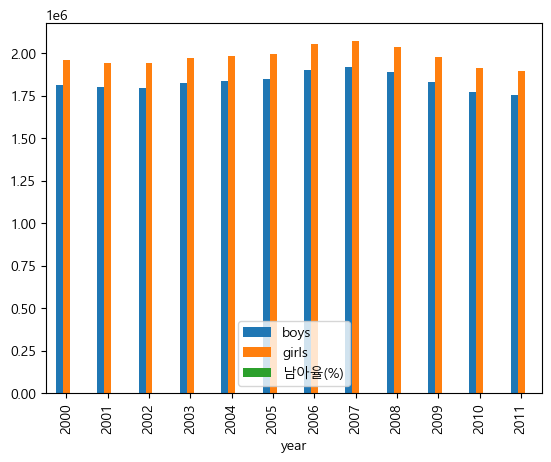

In [98]:
birthDF.loc[2000:].plot(kind='bar')
plt.show()